# Part I: What is the Airbnb offer in Boston?

Let's assume your friends are going to Boston. What they require from the accommodation when traveling are: 
* good location 
* privacy
* cleanliness. 

What advice would you give them on how to choose where to stay in Boston using Airbnb?

In [ ]:
# Read necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read data
df = pd.read_csv('data/listings.csv')
print(df.shape)
df.head()

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
# What are the features contained in data
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
# What are the types different features
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [6]:
# Drop the rows with missing response values
df = df.dropna(subset = ['price'], axis = 0)

In [7]:
# Drop columns with all NaN values
df = df.dropna(how = 'all', axis = 1)

In the figures below, you can see that if you care about privacy, location and cleanliness, the analysis suggests  that your choice should be Private room and Entire home/apt in the following neighbourhoods: Financial District, Chestnut Hill, Brookline, Government Center, Leather District, North End, West End, Theater District and Back Bay

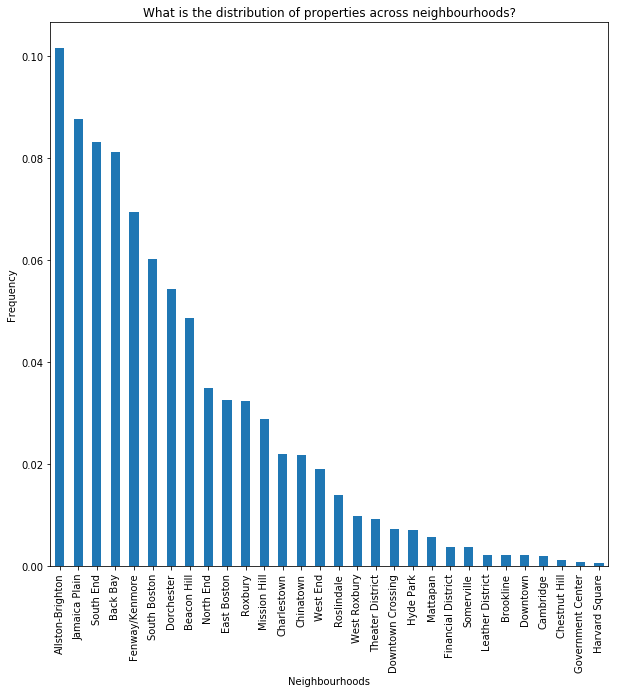

In [8]:
# What is the distribution of properties across neighbourhoods?
neighbourhood_values = df.neighbourhood.value_counts()
plt.figure(figsize=(10,10))
(neighbourhood_values/df.shape[0]).plot(kind="bar");
plt.title("What is the distribution of properties across neighbourhoods?");
plt.ylabel('Frequency');
plt.xlabel('Neighbourhoods');

In [9]:
# Properties in which neighborhoods are associated with the best scores for location (mean value)
df.groupby('neighbourhood').review_scores_location.agg([min, max, pd.Series.mean, pd.Series.mode])\
.sort_values('mean', ascending = False)

,min,max,mean,mode
neighbourhood,,,,
Government Center,10.0,10.0,10.000000,10
Brookline,10.0,10.0,10.000000,10
Chestnut Hill,10.0,10.0,10.000000,10
Financial District,10.0,10.0,10.000000,10
North End,9.0,10.0,9.953271,10
Beacon Hill,8.0,10.0,9.941176,10
Back Bay,8.0,10.0,9.940909,10
West End,8.0,10.0,9.729730,10
South End,8.0,10.0,9.725806,10


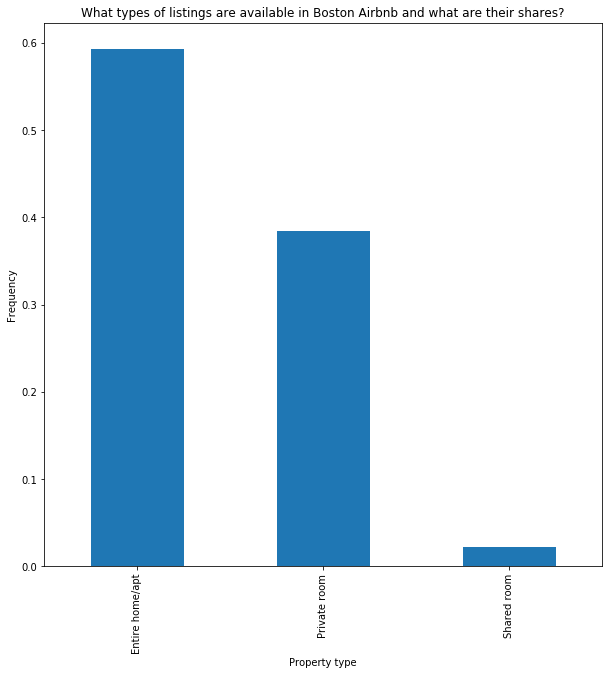

In [10]:
# What types of properties are available in Boston Airbnb and what are their shares?
values = df.room_type.value_counts()
plt.figure(figsize=(10,10))
(values/df.shape[0]).plot(kind="bar");
plt.title("What types of listings are available in Boston Airbnb and what are their shares?");
plt.ylabel('Frequency');
plt.xlabel('Property type');

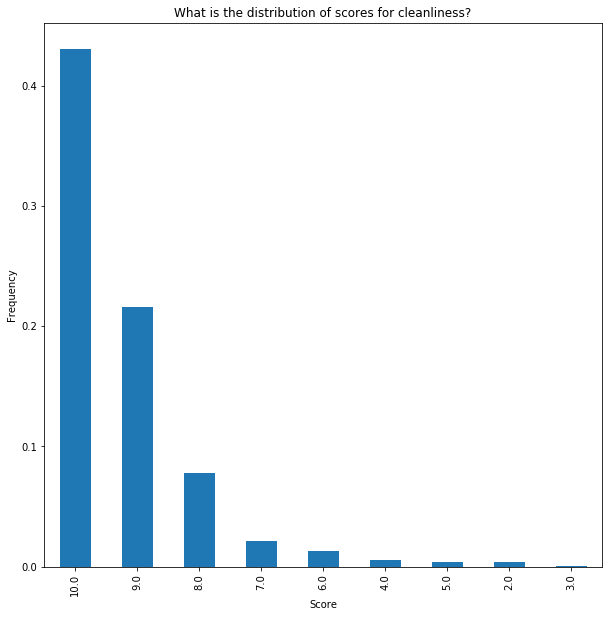

In [11]:
# What is the distribution of scores for cleanliness?
values = df.review_scores_cleanliness.value_counts()
plt.figure(figsize=(10,10))
(values/df.shape[0]).plot(kind="bar");
plt.title("What is the distribution of scores for cleanliness?");
plt.ylabel('Frequency');
plt.xlabel('Score');

In [12]:
# What are the best neighborhoods to choose in terms of location of the property and its privacy and cleanliness
df_filtered = df[(df.room_type.isin(['Private room', 'Entire home/apt'])) & (df.review_scores_cleanliness == 10)]
df_filtered.groupby(['neighbourhood']).review_scores_location.agg([min, max, pd.Series.mean, pd.Series.mode]).sort_values('mean', ascending = False)

,min,max,mean,mode
neighbourhood,,,,
Financial District,10.0,10.0,10.000000,10
Brookline,10.0,10.0,10.000000,10
Chestnut Hill,10.0,10.0,10.000000,10
Government Center,10.0,10.0,10.000000,10
Back Bay,9.0,10.0,9.990909,10
Beacon Hill,8.0,10.0,9.961039,10
North End,9.0,10.0,9.950820,10
West End,9.0,10.0,9.809524,10
South End,8.0,10.0,9.787500,10


In [13]:
# What is the best accomodation by neighbourhood and room type?
# # Remove rows with missing values in column 'review_scores_value'
df_filtered = df[(df.room_type.isin(['Private room', 'Entire home/apt'])) & \
                 df.neighbourhood.isin(['Financial District', 'Brookline', 'Chestnut Hill', 'Government Center]'])] \
                 .dropna(subset = ['review_scores_value'], how = 'any')

ans = df_filtered.groupby(['neighbourhood', 'room_type']).apply(lambda x: x.loc[x.review_scores_value.idxmax()])
ans[['neighbourhood','room_type', 'name', 'description','review_scores_value']]

neighbourhood        room_type  \
neighbourhood      room_type                                              
Brookline          Private room              Brookline     Private room   
Chestnut Hill      Private room          Chestnut Hill     Private room   
Financial District Entire home/apt  Financial District  Entire home/apt   
                   Private room     Financial District     Private room   

                                                                            name  \
neighbourhood      room_type                                                       
Brookline          Private room     Private Room Boston/Brookline Great location   
Chestnut Hill      Private room                       Spacious room, shared bath   
Financial District Entire home/apt          Stunning and Spacious in City Center   
                   Private room                         Marriott's Customs House   

                                                                          description  \
neighbourhood      room_type                                                            
Brookline          Private room     My place is close to 4Acoffee, Starbucks, Harr...   
Chestnut Hill      Private room     My place is good for couples, solo adventurers...   
Financial District Entire home/apt  This beautifully renovated and designer decora...   
                   Private room     I bedroom located in downtown Boston, Ma. View...   

                                    review_scores_value  
neighbourhood      room_type                             
Brookline          Private room                    10.0  
Chestnut Hill      Private room                    10.0  
Financial District Entire home/apt                 10.0  
                   Private room                    10.0

In [14]:
# Additional analyses

In [15]:
#W hat is the average score for each room type category?
df.groupby('room_type').review_scores_value.mean()

room_type
Entire home/apt    9.168601
Private room       9.162011
Shared room        9.283019
Name: review_scores_value, dtype: float64

In [16]:
# What is the average score for each neighbourhood?
df.groupby('neighbourhood').review_scores_value.mean()

neighbourhood
Allston-Brighton       9.059701
Back Bay               9.127854
Beacon Hill            9.248366
Brookline              9.500000
Cambridge              7.500000
Charlestown            9.442623
Chestnut Hill          9.000000
Chinatown              9.088889
Dorchester             9.071429
Downtown               8.428571
Downtown Crossing      9.047619
East Boston            8.981132
Fenway/Kenmore         8.813665
Financial District    10.000000
Government Center      9.333333
Harvard Square              NaN
Hyde Park              9.277778
Jamaica Plain          9.460967
Leather District       9.800000
Mattapan               8.666667
Mission Hill           8.626866
North End              9.327103
Roslindale             9.565217
Roxbury                8.978947
Somerville             8.857143
South Boston           9.353933
South End              9.236948
Theater District       8.863636
West End               8.891892
West Roxbury           9.629630
Name: review_scores_value,

In [17]:
# Are there significant differences in the average scores assigned to different room types?
df.groupby('room_type').review_scores_value.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,1637.0,9.168601,0.966893,2.0,9.0,9.0,10.0,10.0
Private room,1074.0,9.162011,1.080976,2.0,9.0,9.0,10.0,10.0
Shared room,53.0,9.283019,0.885293,6.0,9.0,9.0,10.0,10.0


In [18]:
# What combinations of neighbourhood and room types are most common?
df.groupby(['neighbourhood', 'room_type']).size().sort_values(ascending = False).head(20)

neighbourhood     room_type      
Back Bay          Entire home/apt    251
South End         Entire home/apt    231
Allston-Brighton  Private room       209
Fenway/Kenmore    Entire home/apt    187
Jamaica Plain     Private room       167
South Boston      Entire home/apt    148
Jamaica Plain     Entire home/apt    145
Allston-Brighton  Entire home/apt    143
Beacon Hill       Entire home/apt    142
Dorchester        Private room       138
North End         Entire home/apt    106
Chinatown         Entire home/apt     73
Roxbury           Private room        68
South Boston      Private room        65
West End          Entire home/apt     63
South End         Private room        61
East Boston       Entire home/apt     60
Fenway/Kenmore    Private room        56
Charlestown       Entire home/apt     55
Mission Hill      Private room        55
dtype: int64